# Lab 2: Gaussian Elimination
Kabilan Sriranjan

02/03/18

In [276]:
import math
import time
import random as rn
import numpy as np
import matplotlib.pyplot as plt

## Question 2.

randomMatrix(n) creates an nxn numpy array with random entries taken uniformly from [-1,1]

In [277]:
def randomMatrix(n):
    M = []
    for i in range(0, n):
        r = []
        for j in range(0, n):
            r.append(rn.uniform(-1,1))
        M.append(r)
    return np.matrix(M)

## Question 3.
gepp(M) is my implementation of Gaussian Elimination with partial pivoting. I used two subroutines, one to move the best row to pivot to the top and another to eliminate a single column.

In [278]:
#Find the largest possible pivot in the kth column of M and move it to position k
def movePivot(M,k):
    mx = np.abs(M[k,k])
    mxIndex = k
    for i in range(k, M.shape[0]):
        cur = np.abs(M[i,k])
        if cur>mx:
            mx = cur
            mxIndex = i
    M[[k,mxIndex]] = M[[mxIndex,k]]
    
#Use the pivot at position (k,k) to nullify all entries below it
def eliminate(M,k):
    pivot = M[k,k]
    for i in range(k+1, M.shape[0]):
        r = -1*M[i,k]/pivot
        M[i] += r*M[k]

#Gaussian elimination with partial pivoting
def gepp(M):
    for i in range(0, M.shape[0]):
        movePivot(M, i)
        eliminate(M, i)

## Question 4.

In [294]:
#get the growth factor of a matrix
def growthFactor(M):
    U = M.copy()
    gepp(U)
    return U.max()

#reduce k matrices of each n given in size
#matrices are generated by the generator function
def reduceMatrices(generator, sizes, k):
    start = time.time()
    data = []
    for n in sizes:
        print("Reducing matrices of size "+str(n), end="")
        for i in range(k):
            M = generator(n)
            d = [n, growthFactor(M)]
            data.append(d)
            print(".", end="")
        print(" Done.")
    end = time.time()
    print("Fully completed. Execution took "+str(int(end-start))+" seconds")
    return np.matrix(data)

In [295]:
ns = np.unique(np.logspace(1, 3, 20).astype(int))
data = reduceMatrices(randomMatrix, ns, 5)

Reducing matrices of size 10..... Done.
Reducing matrices of size 12..... Done.
Reducing matrices of size 16..... Done.
Reducing matrices of size 20..... Done.
Reducing matrices of size 26..... Done.
Reducing matrices of size 33..... Done.
Reducing matrices of size 42..... Done.
Reducing matrices of size 54..... Done.
Reducing matrices of size 69..... Done.
Reducing matrices of size 88..... Done.
Reducing matrices of size 112..... Done.
Reducing matrices of size 143..... Done.
Reducing matrices of size 183..... Done.
Reducing matrices of size 233..... Done.
Reducing matrices of size 297..... Done.
Reducing matrices of size 379..... Done.
Reducing matrices of size 483..... Done.
Reducing matrices of size 615..... Done.
Reducing matrices of size 784..... Done.
Reducing matrices of size 1000..... Done.
Fully completed. Execution took 183 seconds


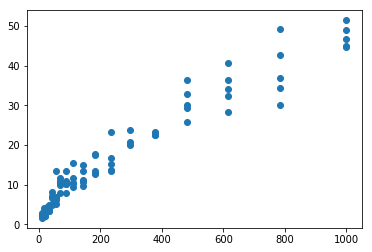

In [302]:
x = np.array(data[:,0]).flatten()
logx = np.log(x)
y = np.array(data[:,1]).flatten()
logy = np.log(y)
plt.scatter(x,y)
plt.show()

## Question 5.


In [304]:
data = reduceMatrices(randomMatrix, [20], 500)

Reducing matrices of size 20.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... Done.
Fully completed. Execution took 3 seconds


In [317]:
x = np.array(data[:,1]).flatten()
buckets = np.linspace(math.floor(x.min()), math.ceil(x.max()), 20)
counts = np.zeros(buckets.size)
print(counts.size)

20
